In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# data processing/manipulation
pd.options.mode.chained_assignment = None
import re

# data visualization
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import plotly.express as px

# stopwords, tokenizer, stemmer
import nltk  
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist

# spell correction, lemmatization
from textblob import TextBlob
from textblob import Word

# sklearn
from sklearn.model_selection import train_test_split


In [2]:
# olah dataset
trump_df = pd.read_csv('../input/us-election-2020-tweets/hashtag_donaldtrump.csv', lineterminator='\n')
biden_df = pd.read_csv('../input/us-election-2020-tweets/hashtag_joebiden.csv', lineterminator='\n')

# **Trump Tweets Data**

In [3]:
trump_df.head(10)

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121
5,2020-10-15 00:00:17,1.316529e+18,@CLady62 Her 15 minutes were over long time ag...,2.0,0.0,Twitter for Android,1.138416e+09,Farris Flagg,FarrisFlagg,#BidenHarris2020 #JoeBiden2020 #KamalaHarrisFo...,...,2363.0,"Perris,California",33.782519,-117.228648,NaN,United States of America,North America,California,CA,2020-10-21 00:00:01.866082651
6,2020-10-15 00:00:17,1.316529e+18,@richardmarx Glad u got out of the house! DICK...,0.0,0.0,Twitter for iPhone,7.674018e+17,Michael Wilson,wilsonfire9,NaN,...,75.0,"Powell, TN",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:02.239299182
7,2020-10-15 00:00:18,1.316529e+18,@DeeviousDenise @realDonaldTrump @nypost There...,0.0,0.0,Twitter for iPhone,9.007611e+17,Stacey Gulledge 🇺🇸 Patriot ♥️ KAG 🙏 👮‍♀️♥️,sm_gulledge,"Patriot, Wife, “Shaken not Stirred” Mom of two...",...,766.0,"Ohio, USA",40.225357,-82.688140,NaN,United States of America,North America,Ohio,OH,2020-10-21 00:00:02.612515712
8,2020-10-15 00:00:20,1.316529e+18,One of the single most effective remedies to e...,0.0,0.0,Twitter Web App,5.404769e+08,Jamieo,jamieo33,"Don't know what I am. Can lean left and right,...",...,151.0,"Pennsylvania, USA",40.969989,-77.727883,NaN,United States of America,North America,Pennsylvania,PA,2020-10-21 00:00:02.985732243
9,2020-10-15 00:00:21,1.316529e+18,#Election2020 #Trump \n#FreedomOfSpeech https:...,0.0,0.0,Twitter Web App,1.305533e+18,Johnny Quest,JohnnyQuest22,Independent\n\nWhat is your American Dream?\nT...,...,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:03.358948773


In [4]:
# Looking at the shape of trump_df (rows, columns)
trump_df.shape

(970919, 21)

In [5]:
# Getting some insights on trump_df dataset (with describe())
trump_df.describe()

,tweet_id,likes,retweet_count,user_id,user_followers_count,lat,long
count,9.709190e+05,970919.000000,970919.000000,9.709190e+05,9.709190e+05,445719.000000,445719.000000
mean,1.322494e+18,7.477011,1.698500,4.468311e+17,2.260357e+04,35.697936,-40.369638
std,2.555133e+15,158.058117,40.028419,5.544702e+17,3.042152e+05,18.823129,67.531751
min,1.316529e+18,0.000000,0.000000,5.310000e+02,0.000000e+00,-90.000000,-175.202642
25%,1.320478e+18,0.000000,0.000000,2.169326e+08,7.700000e+01,32.701939,-96.796856
50%,1.323612e+18,0.000000,0.000000,2.373392e+09,4.410000e+02,39.783730,-74.006015
75%,1.324505e+18,1.000000,0.000000,1.078344e+18,2.066000e+03,46.603354,6.776314
max,1.325589e+18,74084.000000,20491.000000,1.325581e+18,1.911533e+07,90.000000,179.048837


In [6]:
# More insights on trump_dfset with info()
trump_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970919 entries, 0 to 970918
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            970919 non-null  object 
 1   tweet_id              970919 non-null  float64
 2   tweet                 970919 non-null  object 
 3   likes                 970919 non-null  float64
 4   retweet_count         970919 non-null  float64
 5   source                970043 non-null  object 
 6   user_id               970919 non-null  float64
 7   user_name             970903 non-null  object 
 8   user_screen_name      970919 non-null  object 
 9   user_description      869653 non-null  object 
 10  user_join_date        970919 non-null  object 
 11  user_followers_count  970919 non-null  float64
 12  user_location         675966 non-null  object 
 13  lat                   445719 non-null  float64
 14  long                  445719 non-null  float64
 15  

# **Biden Tweets Data**

In [7]:
biden_df.head(10)

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:18,1.316529e+18,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...,0.0,0.0,Twitter for iPad,8.099044e+08,Cheri A. 🇺🇸,Biloximeemaw,"Locked and loaded Meemaw. Love God, my family ...",...,6628.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.517827283
2,2020-10-15 00:00:20,1.316529e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,NaN,...,1536.0,Golden Valley Arizona,46.304036,-109.171431,NaN,United States of America,North America,Montana,MT,2020-10-21 00:00:01.035654566
3,2020-10-15 00:00:21,1.316529e+18,@chrislongview Watching and setting dvr. Let’s...,0.0,0.0,Twitter for iPhone,8.242596e+17,Michelle Ferg,MichelleFerg4,NaN,...,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.553481849
4,2020-10-15 00:00:22,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,A Silicon Valley #independent #News #Media #St...,...,390.0,"California, USA",36.701463,-118.755997,NaN,United States of America,North America,California,CA,2020-10-21 00:00:02.071309132
5,2020-10-15 00:00:23,1.316529e+18,"""IS THIS WRONG??!!"" Cory Booker's BRILLIANT Fi...",0.0,0.0,Twitter Web App,3.057279e+08,Dose of Dissonance,Dose_Dissonance,YOUTUBE CHANNEL: https://t.co/EFnKm5gnvV MERCH...,...,4622.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:02.589136415
6,2020-10-15 00:00:25,1.316529e+18,"In 2020, #NYPost is being #censorship #CENSORE...",0.0,0.0,Twitter for iPhone,1.994033e+07,Change Illinois | Biden will increase taxes by...,changeillinois,"Illinois, home of Lincoln and Reagan, used to ...",...,1397.0,"Chicago, Illinois",41.875562,-87.624421,Chicago,United States of America,North America,Illinois,IL,2020-10-21 00:00:03.106963698
7,2020-10-15 00:00:31,1.316529e+18,►► Tell Politicians to STICK IT with this FREE...,0.0,0.0,Freebie-Depot,1.030832e+08,🆓 Freebie Depot,FreebieDepot,Free Stuff - No Fluff! Get all kinds of FREE ...,...,6402.0,USA - Land of the FREE!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:03.624790981
8,2020-10-15 00:00:36,1.316529e+18,#Biden https://t.co/qMs0PmUev5,0.0,0.0,Twitter Web App,1.272568e+18,Kenneth,Kennethuteliv,NaN,...,103.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:04.142618264
9,2020-10-15 00:00:41,1.316529e+18,Proof Bidens are crooked. Twitter will suspen...,1.0,1.0,Twitter for Android,1.275659e+18,Jake Rivendale,JakeRivendale,NaN,...,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:04.660445547


In [8]:
# Looking at the shape of biden_df (rows, columns)
biden_df.shape

(776886, 21)

In [9]:
# Getting some insights on biden_df dataset with describe()
biden_df.describe()

,tweet_id,likes,retweet_count,user_id,user_followers_count,lat,long
count,7.768860e+05,776886.000000,776886.000000,7.768860e+05,7.768860e+05,355293.000000,355293.000000
mean,1.322844e+18,10.161164,2.131331,4.532033e+17,2.884994e+04,35.104203,-41.979660
std,2.585560e+15,390.974423,96.661527,5.573483e+17,4.141085e+05,17.907910,67.823724
min,1.316529e+18,0.000000,0.000000,1.081000e+03,0.000000e+00,-79.406307,-172.120051
25%,1.320870e+18,0.000000,0.000000,2.257285e+08,7.400000e+01,31.816038,-97.268406
50%,1.323899e+18,0.000000,0.000000,2.464208e+09,4.280000e+02,39.783730,-74.006015
75%,1.325115e+18,2.000000,0.000000,1.088044e+18,2.081000e+03,43.653482,5.966069
max,1.325589e+18,165702.000000,63473.000000,1.325575e+18,8.241710e+07,90.000000,179.048837


In [10]:
# More insights on trump_dfset with info()
biden_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776886 entries, 0 to 776885
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            776886 non-null  object 
 1   tweet_id              776886 non-null  float64
 2   tweet                 776886 non-null  object 
 3   likes                 776886 non-null  float64
 4   retweet_count         776886 non-null  float64
 5   source                776173 non-null  object 
 6   user_id               776886 non-null  float64
 7   user_name             776868 non-null  object 
 8   user_screen_name      776886 non-null  object 
 9   user_description      694880 non-null  object 
 10  user_join_date        776886 non-null  object 
 11  user_followers_count  776886 non-null  float64
 12  user_location         543095 non-null  object 
 13  lat                   355293 non-null  float64
 14  long                  355293 non-null  float64
 15  

In [11]:
# pembersihan data
trump_df = trump_df.drop(columns=['tweet_id','user_id','user_name','user_screen_name','user_description','user_join_date','collected_at'])
biden_df = biden_df.drop(columns=['tweet_id','user_id','user_name','user_screen_name','user_description','user_join_date','collected_at'])

# pembagian kolom data
trump_df = trump_df.rename(columns={"likes": "Likes", "retweet_count": "Retweets", 
                                    "state": "State", "user_followers_count": "Followers"})
biden_df = biden_df.rename(columns={"likes": "Likes", "retweet_count": "Retweets", 
                                    "state": "State", "user_followers_count": "Followers"})

# upload data nama kota
d = {"United States of America":"United States"}
trump_df['country'].replace(d, inplace=True)
biden_df['country'].replace(d, inplace=True)

trump_df = trump_df.loc[trump_df['country'] == "United States"]
biden_df = biden_df.loc[biden_df['country'] == "United States"]

# hapuskan garis null
trump_df = trump_df.dropna()
biden_df = biden_df.dropna()

# **Preprocessing Tweets**

In [12]:
to_remove = r'\d+|http?\S+|[^A-Za-z0-9]+'
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

# Function to preprocess tweet 
def clean_tweet(tweet, stem=False, lemmatize=False):

    # Make all text lowercase
    tweet = tweet.lower()
    
    # Remove links, special characters, punctuation, numbers, etc.
    tweet = re.sub(to_remove, ' ', tweet)
        
    filtered_tweet = []
    words = word_tokenize(tweet) 

    # Remove stopwords and stem
    for word in words:
        if not word in stop_words:
            if stem:
                filtered_tweet.append(ps.stem(word))
            elif lemmatize:
                filtered_tweet.append(Word(word).lemmatize())
            else:
                filtered_tweet.append(word)
            
    return filtered_tweet

In [13]:
# Filtering all trump and biden tweets by applying cleantweet()
trump_df['tweetNew'] = trump_df.tweet.apply(lambda x: clean_tweet(x))
biden_df['tweetNew'] = biden_df.tweet.apply(lambda x: clean_tweet(x))


In [14]:
trump_df

,created_at,tweet,Likes,Retweets,source,Followers,user_location,lat,long,city,country,continent,State,state_code,tweetNew
2,2020-10-15 00:00:02,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,1185.0,Portland,45.520247,-122.674195,Portland,United States,North America,Oregon,OR,"[trump, student, used, hear, years, ten, years..."
4,2020-10-15 00:00:08,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,5393.0,Washington DC,38.894992,-77.036558,Washington,United States,North America,District of Columbia,DC,"[get, tie, get, tie, trump, rally, iowa]"
11,2020-10-15 00:00:25,"In 2020, #NYPost is being #censorship #CENSORE...",0.0,0.0,Twitter for iPhone,1396.0,"Chicago, Illinois",41.875562,-87.624421,Chicago,United States,North America,Illinois,IL,"[nypost, censorship, censored, twitter, manipu..."
12,2020-10-15 00:00:26,#Trump #PresidentTrump #Trump2020LandslideVict...,3.0,5.0,Twitter for Android,496.0,"San Diego, CA",32.717421,-117.162771,San Diego,United States,North America,California,CA,"[trump, presidenttrump, trump, landslidevictor..."
22,2020-10-15 00:01:14,"#Trump: Nobody likes to tell you this, but som...",1.0,1.0,Twitter Web App,1185.0,Portland,45.520247,-122.674195,Portland,United States,North America,Oregon,OR,"[trump, nobody, likes, tell, farmers, better, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970879,2020-11-08 23:58:14,@realDonaldTrump @marklevinshow NO #Hoax! The ...,0.0,0.0,Twitter for Android,48.0,"Chicago, USA",41.875562,-87.624421,Chicago,United States,North America,Illinois,IL,"[realdonaldtrump, marklevinshow, hoax, america..."
970881,2020-11-08 23:58:16,"@RBReich Bob,\nit's pretty straight forward.\n...",6.0,1.0,Twitter Web App,425.0,"oakland, california",37.804456,-122.271356,Oakland,United States,North America,California,CA,"[rbreich, bob, pretty, straight, forward, trum..."
970888,2020-11-08 23:58:38,"@Jim_Jordan FCK NO , Democrats and the #msm la...",1.0,0.0,Twitter for iPhone,1549.0,"New York, USA",40.712728,-74.006015,New York,United States,North America,New York,NY,"[jim, jordan, fck, democrats, msm, launched, h..."
970890,2020-11-08 23:58:44,Cómo pasó el abogado de Trump de un hotel a un...,0.0,1.0,Twitter Web App,1517.0,New York City,40.712728,-74.006015,New York,United States,North America,New York,NY,"[c, mo, pas, el, abogado, de, trump, de, un, h..."


In [15]:
trump_df.drop(trump_df[trump_df.Followers < 5].index, inplace=True)
biden_df.drop(biden_df[biden_df.Followers < 5].index, inplace=True)

In [16]:
biden_df.head()

,created_at,tweet,Likes,Retweets,source,Followers,user_location,lat,long,city,country,continent,State,state_code,tweetNew
6,2020-10-15 00:00:25,"In 2020, #NYPost is being #censorship #CENSORE...",0.0,0.0,Twitter for iPhone,1397.0,"Chicago, Illinois",41.875562,-87.624421,Chicago,United States,North America,Illinois,IL,"[nypost, censorship, censored, twitter, manipu..."
17,2020-10-15 00:01:23,"Comments on this? ""Do Democrats Understand how...",0.0,0.0,Twitter Web App,83.0,"Tampa, Florida",27.947760,-82.458444,Tampa,United States,North America,Florida,FL,"[comments, democrats, understand, ruthless, ch..."
25,2020-10-15 00:01:57,@RealJamesWoods #BidenCrimeFamily #JoeBiden #H...,0.0,0.0,Twitter for Android,29.0,"Los Angeles, CA",34.053691,-118.242766,Los Angeles,United States,North America,California,CA,"[realjameswoods, bidencrimefamily, joebiden, h..."
29,2020-10-15 00:02:06,Come on @ABC PLEASE DO THE RIGHT THING. Move t...,0.0,0.0,Twitter Web App,166.0,"New York, NY",40.712728,-74.006015,New York,United States,North America,New York,NY,"[come, abc, please, right, thing, move, biden,..."
34,2020-10-15 00:02:23,#realDonaldTrump addresses #JoeBiden and #Hunt...,0.0,1.0,Twitter for iPhone,411.0,"Minneapolis, MN",44.977300,-93.265469,Minneapolis,United States,North America,Minnesota,MN,"[realdonaldtrump, addresses, joebiden, hunterb..."


In [17]:
# Looking at 5 trump tweets after filtering
trump_df['tweetNew'].head()

2     [trump, student, used, hear, years, ten, years...
4              [get, tie, get, tie, trump, rally, iowa]
11    [nypost, censorship, censored, twitter, manipu...
12    [trump, presidenttrump, trump, landslidevictor...
22    [trump, nobody, likes, tell, farmers, better, ...
Name: tweetNew, dtype: object

In [18]:
# Looking at 5 trump tweets after filtering
biden_df['tweetNew'].head()

6     [nypost, censorship, censored, twitter, manipu...
17    [comments, democrats, understand, ruthless, ch...
25    [realjameswoods, bidencrimefamily, joebiden, h...
29    [come, abc, please, right, thing, move, biden,...
34    [realdonaldtrump, addresses, joebiden, hunterb...
Name: tweetNew, dtype: object

# **Sentimen Analysis**

In [19]:
# Function to perform sentitment analysis on trump and biden dataframes
def sentiment_analysis(df):
    
    # Determine polarity and subjectivity
    df['Polarity'] = df['tweetNew'].apply(lambda x: TextBlob(' '.join(x)).sentiment.polarity)
    df['Subjectivity'] = df['tweetNew'].apply(lambda x: TextBlob(' '.join(x)).sentiment.subjectivity)
    
    # Classify overall sentiment
    df.loc[df.Polarity > 0,'Sentiment'] = 'positive'
    df.loc[df.Polarity == 0,'Sentiment'] = 'neutral'
    df.loc[df.Polarity < 0,'Sentiment'] = 'negative'
    
    return df[['tweet','tweetNew','Polarity','Subjectivity','Sentiment']].head()

In [20]:
# Perform sentiment analysis on trump_df
sentiment_analysis(trump_df)

,tweet,tweetNew,Polarity,Subjectivity,Sentiment
2,"#Trump: As a student I used to hear for years,...","[trump, student, used, hear, years, ten, years...",0.333333,0.333333,positive
4,You get a tie! And you get a tie! #Trump ‘s ra...,"[get, tie, get, tie, trump, rally, iowa]",0.000000,0.000000,neutral
11,"In 2020, #NYPost is being #censorship #CENSORE...","[nypost, censorship, censored, twitter, manipu...",-0.148810,0.678571,negative
12,#Trump #PresidentTrump #Trump2020LandslideVict...,"[trump, presidenttrump, trump, landslidevictor...",0.500000,0.750000,positive
22,"#Trump: Nobody likes to tell you this, but som...","[trump, nobody, likes, tell, farmers, better, ...",0.261905,0.595238,positive


In [21]:
# Perform sentiment analysis on biden_df
sentiment_analysis(biden_df)

,tweet,tweetNew,Polarity,Subjectivity,Sentiment
6,"In 2020, #NYPost is being #censorship #CENSORE...","[nypost, censorship, censored, twitter, manipu...",-0.148810,0.678571,negative
17,"Comments on this? ""Do Democrats Understand how...","[comments, democrats, understand, ruthless, ch...",-1.000000,1.000000,negative
25,@RealJamesWoods #BidenCrimeFamily #JoeBiden #H...,"[realjameswoods, bidencrimefamily, joebiden, h...",0.000000,0.000000,neutral
29,Come on @ABC PLEASE DO THE RIGHT THING. Move t...,"[come, abc, please, right, thing, move, biden,...",0.078571,0.178571,positive
34,#realDonaldTrump addresses #JoeBiden and #Hunt...,"[realdonaldtrump, addresses, joebiden, hunterb...",0.000000,0.000000,neutral


# **Data Visualization**

# Number of tweets by sentiment

Trump Tweet Sentiment Breakdown
Number of Positive Tweets:  33239
Number of Neutral Tweets:  44291
Number of Negative Tweets:  22173


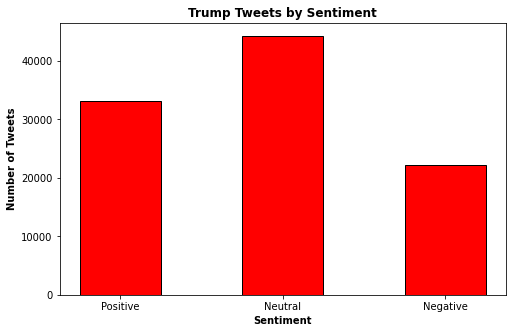

In [22]:
# Overall sentiment breakdown - Trump 
print("Trump Tweet Sentiment Breakdown")

trump_positive = len(trump_df.loc[trump_df.Sentiment=='positive'])
trump_neutral = len(trump_df.loc[trump_df.Sentiment=='neutral'])
trump_negative = len(trump_df.loc[trump_df.Sentiment=='negative'])

print("Number of Positive Tweets: ", trump_positive)
print("Number of Neutral Tweets: ", trump_neutral)
print("Number of Negative Tweets: ", trump_negative)

# Graphing the number of trump tweets by sentiment
data_t = {'Positive':trump_positive,'Neutral':trump_neutral,'Negative':trump_negative}
sentiment_t = list(data_t.keys()) 
num_tweets_t = list(data_t.values()) 

plt.figure(figsize = (8, 5)) 

plt.bar(sentiment_t, num_tweets_t, color ='red', width = 0.5, edgecolor='black',) 

plt.xlabel("Sentiment", fontweight ='bold') 
plt.ylabel("Number of Tweets", fontweight ='bold') 
plt.title("Trump Tweets by Sentiment", fontweight ='bold') 
plt.show() 

Biden Tweet Sentiment Breakdown
Number of Positive Tweets:  33297
Number of Neutral Tweets:  41698
Number of Negative Tweets:  13469


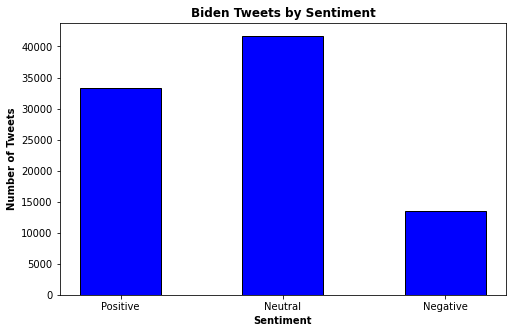

In [23]:
# Overall sentiment breakdown - Biden 
print("Biden Tweet Sentiment Breakdown")

biden_positive = len(biden_df.loc[biden_df.Sentiment=='positive'])
biden_neutral = len(biden_df.loc[biden_df.Sentiment=='neutral'])
biden_negative = len(biden_df.loc[biden_df.Sentiment=='negative'])

print("Number of Positive Tweets: ", biden_positive)
print("Number of Neutral Tweets: ", biden_neutral)
print("Number of Negative Tweets: ", biden_negative)

# Graphing the number of biden tweets by sentiment
data_b = {'Positive':biden_positive,'Neutral':biden_neutral,'Negative':biden_negative}
sentiment_b = list(data_b.keys()) 
num_tweets_b = list(data_b.values()) 

plt.figure(figsize = (8, 5)) 

plt.bar(sentiment_b, num_tweets_b, color ='blue', width = 0.5, edgecolor='black') 

plt.xlabel("Sentiment", fontweight ='bold') 
plt.ylabel("Number of Tweets", fontweight ='bold') 
plt.title("Biden Tweets by Sentiment", fontweight ='bold') 
plt.show() 

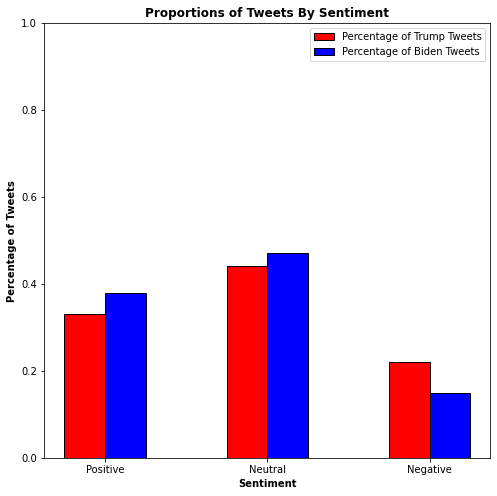

In [24]:
# Calculate relative percentages by sentiment - Trump
total_tweets_t = len(trump_df.Sentiment)
prop_tweets_t = list(map(lambda x: round(x/total_tweets_t,2), num_tweets_t))

# Calculate relative percentages by sentiment - Biden
total_tweets_b = len(biden_df.Sentiment)
prop_tweets_b = list(map(lambda x: round(x/total_tweets_b,2), num_tweets_b))

# Graphing relative percentages of both trump and biden tweets
bar_width = 0.25
plt.subplots(figsize=(8,8))

br1 = np.arange(3) 
br2 = [x + bar_width for x in br1] 

t = plt.bar(br1, prop_tweets_t, color ='r', width = bar_width, 
            edgecolor ='black', label ='Trump') 
b = plt.bar(br2, prop_tweets_b, color ='b', width = bar_width, 
            edgecolor ='black', label ='Biden') 
   
plt.xlabel('Sentiment',fontweight ='bold') 
plt.ylabel('Percentage of Tweets',fontweight ='bold') 
plt.xticks([r + bar_width/2 for r in range(3)],['Positive','Neutral','Negative'])
plt.legend([t,b],['Percentage of Trump Tweets','Percentage of Biden Tweets'])
plt.ylim(0.0, 1.0)
plt.title('Proportions of Tweets By Sentiment',fontweight ='bold')

plt.show()

# **Word Cloud Set**

In [25]:
# Function to return a string of all words in all tweets
def get_all_tweets(df,by_sentiment=False,sentiment="positive"):
    words = ' '.join(df['tweetNew'].apply(lambda x: ' '.join(x)))
    return words

In [26]:
# Create word strings
words_trump = get_all_tweets(trump_df)
words_biden = get_all_tweets(biden_df)

# Tokenize word strings
tokens_trump = word_tokenize(words_trump)
tokens_biden = word_tokenize(words_biden)

# Function to generate word cloud
def create_wordcloud(words):
    
    # create wordcloud
    wordcloud = WordCloud(max_font_size=200, max_words=200, 
                          background_color="white").generate(words)

    # display the generated image
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

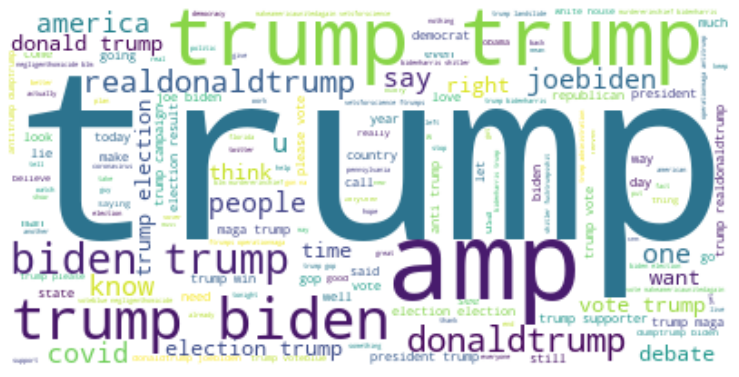

In [27]:
# Generate word cloud of trump tweets
create_wordcloud(words_trump)

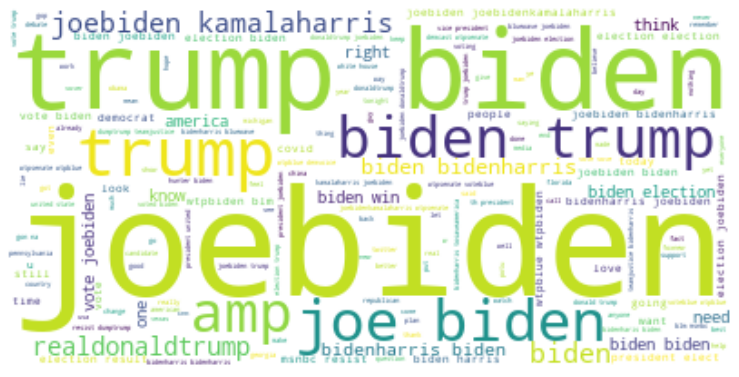

In [28]:
# Generate word cloud of biden tweets
create_wordcloud(words_biden)

In [29]:
# Average polarity by state (trump)
trump_state_polarity = trump_df.groupby("State",as_index=False).mean()

fig = px.bar(trump_state_polarity, x="State", y="Polarity",
            title="<b>Average Polarity of Trump-Related Tweets by State</b>")
fig.update_traces(marker=dict(color="red"),selector=dict(type="bar"),
                  marker_line_color='black', marker_line_width=0.8, opacity=0.6)
fig.show()

In [30]:
# Average polarity by state - Biden
biden_state_polarity = biden_df.groupby("State",as_index=False).mean()

fig = px.bar(biden_state_polarity, x="State", y="Polarity",
            title="<b>Average Polarity of Biden-Related Tweets by State</b>")
fig.update_traces(marker=dict(color="blue"),selector=dict(type="bar"),
                  marker_line_color='black', marker_line_width=0.8, opacity=0.6)
fig.show()